In [1]:
#Importing the necessary libraries

import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

import statsmodels.api as sm


In [2]:
#Importing Configs
# Define the path where config.py is located
#Mac
os.chdir('/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling')
#Linux
#os.chdir('/home/kwnabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

#Configs
finbert_models = config.finbert_models
Body = config.Body
database = config.Local_Database

/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [3]:
#Import Sentiment Data 
state = pd.read_csv(f"{finbert_models}/{Body}/Statements/{Body}_Statements_finbert_model_short.csv")
#state = state[['date','sentiment', 'positive', 'negative', 'neutral']]
state = state[['date','sentiment']]
#state = state.groupby('date').mean().reset_index()

mins = pd.read_csv(f"{finbert_models}/{Body}/Minutes/{Body}_Minutes_finbert_model_short.csv")
mins = mins[['date','sentiment', 'positive', 'negative', 'neutral']]
#mins = mins.groupby('date').mean().reset_index()

state['date'] = pd.to_datetime(state['date'])
#mins['date'] = pd.to_datetime(mins['date'])

# state = pd.merge(state, mins, on='date', how='outer')
# state['sentiment_x'] = state['sentiment_x'].fillna(state['sentiment_y'])
# state['sentiment_y'] = state['sentiment_y'].fillna(state['sentiment_x'])
# state['sentiment'] = state[['sentiment_x', 'sentiment_y']].mean(axis=1)
# print(state.head())


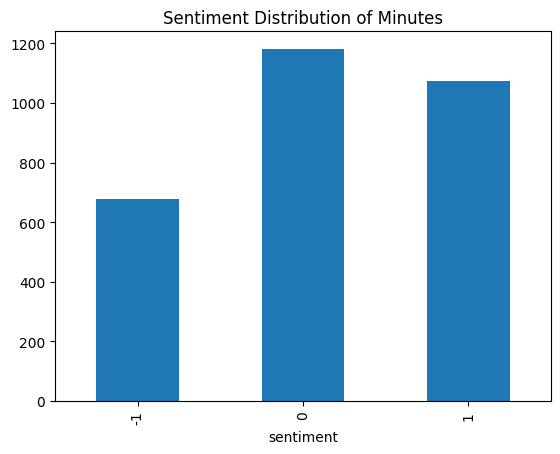

In [4]:
mins = pd.read_csv(f"{finbert_models}/{Body}/Minutes/{Body}_Minutes_finbert_model_short.csv")
state['sentiment'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title('Sentiment Distribution of Minutes')
plt.show()

In [5]:
fedfunds = pd.read_csv(f'{database}/Market Data/Fed Funds/Fed Funds.csv')
fedfunds = fedfunds[['date', 'fedfunds']]
fedfunds['date'] = pd.to_datetime(fedfunds['date'])

state = pd.merge(state, fedfunds, on='date', how='outer')

state['diff'] = state['fedfunds'].diff()

state['event'] = 0

In [6]:
#Event
state['event'] = np.where((state['sentiment'].notna() == True), 1, 0)

#High Rates 
# state['event'] = np.where((state['fedfunds'] > state['fedfunds'].mean()) & (state['sentiment'].notna() == True), 1, 0)

#Rate Hike
#state['event'] = np.where((state['diff'] >= 0.25) & (state['sentiment'].notna() == True), 1, 0)

#Rate cut
#state['event'] = np.where((state['diff'] <= -0.25) & (state['sentiment'].notna() == True), 1, 0)

#Positive Sentiment 
#state = state[(state['sentiment'] > state['sentiment'].mean())]

#Negative Sentiment
#state = state[(state['sentiment'] < state['sentiment'].mean())]

state = state[['date', 'sentiment', 'event']]

In [7]:
#Create a dataframe with a column date that ranges from 1990-01-01 to 2024-01-01 with a daily frequency
#This is used to merge the dataframes
date_rng = pd.date_range(start='1/1/1990', end='1/1/2024', freq='D')
date_rng = pd.DataFrame(date_rng, columns=['date'])
date_rng['temp'] = 1
state = pd.merge(date_rng, state, on='date', how='outer')
state = state[['date', 'sentiment', 'event']]

In [8]:
#Importing Market Data
sp500 = pd.read_csv(f'{database}/Market Data/SP500/SP500.csv')
sp500 = sp500[['date', 'price', 'volume']]
sp500['volume'] = sp500['volume']/1000000
sp500 = sp500.rename(columns={'price':'sp500_price', 'volume':'sp500_volume'})

emini = pd.read_csv(f'{database}/Market Data/E Mini/E Mini SP500.csv')
emini = emini[['date', 'price']]
emini = emini.rename(columns={'price':'emini_price'})

eurodollar = pd.read_csv(f'{database}/Market Data/Eurodollar/Eurodollar.csv')
eurodollar = eurodollar[['date', 'price']]
eurodollar = eurodollar.rename(columns={'price':'eurodollar_price'})

fedfutures = pd.read_csv(f'{database}/Market Data/Fed Futures/FFF 30 Day.csv')
fedfutures = fedfutures[['date', 'price']]
fedfutures = fedfutures.rename(columns={'price':'fedfutures_price'})

vix = pd.read_csv(f'{database}/Market Data/VIX/VIX.csv')
vix = vix[['date', 'sentiment']]
vix = vix.rename(columns={'sentiment':'vix_sentiment'})

unemployment = pd.read_csv(f'{database}/Market Data/Unemployment/Unemployment.csv')
unemployment = unemployment[['date', 'unemployment']]

inflation = pd.read_csv(f'{database}/Market Data/Inflation/Inflation.csv')
inflation = inflation[['date', 'inflation']]

fedfunds = pd.read_csv(f'{database}/Market Data/Fed Funds/Fed Funds.csv')
fedfunds = fedfunds[['date', 'fedfunds']]

pce = pd.read_csv(f'{database}/Market Data/PCE/PCE.csv')
pce = pce.rename(columns={'PCEC_PC1': 'PCE', 'DATE':'date'})

gdp = pd.read_csv(f'{database}/Market Data/GDP/GDP.csv')
gdp = gdp.rename(columns={'DATE':'date', 'GDPC1':'GDP'})

gdpdef = pd.read_csv(f'{database}/Market Data/GDPDEF/GDPDEF.csv')
gdpdef = gdpdef.rename(columns={'DATE':'date', 'GDPDEF_PC1':'gdpdef'})

gdppot = pd.read_csv(f'{database}/Market Data/GDPPOT/GDPPOT.csv')
gdppot = gdppot.rename(columns={'DATE':'date'})

spreturn = pd.read_csv(f'{database}/Market Data/SP500/SP500 Returns Daily.csv')
spreturn = spreturn.rename(columns={'caldt':'date', 'vwretd':'sp500_return'})
#remove dates from date row that are "#NAME?"
#spreturn = spreturn[spreturn['date'] != '#NAME?']

taylor_euro = pd.read_excel(f'{database}/Market Data/Taylor/Taylor Rule Euro Zone.xlsx')

stoxx = pd.read_excel(f'{database}/Market Data/STOXX/STOXX 600 Daily Returns Gross Dividends.xlsx')


euro_funds = pd.read_csv(f'{database}/Market Data/Euro Key Rate/Eurozone Key Interest Rate.csv')
euro_funds['date'] = pd.to_datetime(euro_funds['date'])
euro_funds = euro_funds.rename(columns={'rate':'euro_funds'})

print(euro_funds.head())    

        date  euro_funds
0 2024-02-28         4.5
1 2024-02-27         4.5
2 2024-02-26         4.5
3 2024-02-23         4.5
4 2024-02-22         4.5


/var/folders/9h/v8gnzwrs73v52x4lyzz2z2zc0000gn/T/ipykernel_7106/941126151.py:55: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  euro_funds['date'] = pd.to_datetime(euro_funds['date'])


In [9]:
print(taylor_euro.head())

        date  taylor_euro
0 2023-11-30         8.75
1 2023-10-31         9.55
2 2023-09-30        10.00
3 2023-08-31        11.20
4 2023-07-31        11.50


In [10]:
#conveting date to datetime

sp500['date'] = pd.to_datetime(sp500['date'])
emini['date'] = pd.to_datetime(emini['date'])
eurodollar['date'] = pd.to_datetime(eurodollar['date'])
fedfutures['date'] = pd.to_datetime(fedfutures['date'])
vix['date'] = pd.to_datetime(vix['date'])
unemployment['date'] = pd.to_datetime(unemployment['date'])
inflation['date'] = pd.to_datetime(inflation['date'])
fedfunds['date'] = pd.to_datetime(fedfunds['date'])
pce['date'] = pd.to_datetime(pce['date'])
gdp['date'] = pd.to_datetime(gdp['date'])
gdppot['date'] = pd.to_datetime(gdppot['date'])
gdpdef['date'] = pd.to_datetime(gdpdef['date'])
spreturn['date'] = pd.to_datetime(spreturn['date'])
stoxx['date'] = pd.to_datetime(stoxx['date'])


In [11]:
#Print the first and last dates of every dataframe
print(f"State: {state.date.min()} - {state.date.max()}")
print(f"Mins: {mins.date.min()} - {mins.date.max()}")
print(f"SP500: {sp500.date.min()} - {sp500.date.max()}")
print(f"E Mini: {emini.date.min()} - {emini.date.max()}")
print(f"Eurodollar: {eurodollar.date.min()} - {eurodollar.date.max()}")
print(f"Fed Futures: {fedfutures.date.min()} - {fedfutures.date.max()}")
print(f"VIX: {vix.date.min()} - {vix.date.max()}")
print(f"Unemployment: {unemployment.date.min()} - {unemployment.date.max()}")
print(f"Inflation: {inflation.date.min()} - {inflation.date.max()}")
print(f"Fed Funds: {fedfunds.date.min()} - {fedfunds.date.max()}")
print(f"PCE: {pce.date.min()} - {pce.date.max()}")
print(f"GDP: {gdp.date.min()} - {gdp.date.max()}")
print(f"GDPDEF: {gdpdef.date.min()} - {gdpdef.date.max()}")
print(f"GDPPOT: {gdppot.date.min()} - {gdppot.date.max()}")
print(f"SP500 Return: {spreturn.date.min()} - {spreturn.date.max()}")



State: 1990-01-01 00:00:00 - 2024-02-06 00:00:00
Mins: 1998-07-02 - 2023-05-24
SP500: 1990-01-02 00:00:00 - 2024-02-01 00:00:00
E Mini: 1997-09-09 00:00:00 - 2024-02-01 00:00:00
Eurodollar: 1990-02-02 00:00:00 - 2023-06-15 00:00:00
Fed Futures: 1990-12-14 00:00:00 - 2024-02-01 00:00:00
VIX: 1990-02-02 00:00:00 - 2024-02-01 00:00:00
Unemployment: 1990-01-01 00:00:00 - 2024-01-01 00:00:00
Inflation: 1990-01-01 00:00:00 - 2023-12-01 00:00:00
Fed Funds: 1990-01-01 00:00:00 - 2024-02-06 00:00:00
PCE: 1948-01-01 00:00:00 - 2023-10-01 00:00:00
GDP: 1990-01-01 00:00:00 - 2023-10-01 00:00:00
GDPDEF: 1948-01-01 00:00:00 - 2023-10-01 00:00:00
GDPPOT: 1990-01-01 00:00:00 - 2034-10-01 00:00:00
SP500 Return: 2000-01-03 00:00:00 - 2023-12-29 00:00:00


In [12]:
market = date_rng.copy(deep=True)
market = market[['date']]
market = pd.merge(market, sp500, on='date', how='outer')
market = pd.merge(market, emini, on='date', how='outer')
market = pd.merge(market, eurodollar, on='date', how='outer')
market = pd.merge(market, fedfutures, on='date', how='outer')
market = pd.merge(market, vix, on='date', how='outer')
market = pd.merge(market, unemployment, on='date', how='outer')
market = pd.merge(market, inflation, on='date', how='outer')
market = pd.merge(market, fedfunds, on='date', how='outer')
market = pd.merge(market, pce, on='date', how='outer')
market = pd.merge(market, gdp, on='date', how='outer')
market = pd.merge(market, gdppot, on='date', how='outer')
market = pd.merge(market, gdpdef, on='date', how='outer')
market = pd.merge(market, spreturn, on='date', how='outer')
market = pd.merge(market, taylor_euro, on='date', how='outer')
market = pd.merge(market, euro_funds, on='date', how='outer')
market = pd.merge(market, stoxx, on='date', how='outer')

market = market.sort_values(by='date')

market['unemployment'] = market['unemployment'].fillna(method='ffill')
market['inflation'] = market['inflation'].fillna(method='ffill')

market = market.fillna(method='ffill')

market.to_csv(f'{database}/Market Data/All Market Data.csv', index=False)

state = pd.merge(state, market, on='date', how='outer')

state = state[state['date'] >= '2001-01-01']

In [13]:
print(market.head())

            date  sp500_price  sp500_volume  emini_price  eurodollar_price  \
13811 1948-01-01          NaN           NaN          NaN               NaN   
13812 1948-04-01          NaN           NaN          NaN               NaN   
13813 1948-07-01          NaN           NaN          NaN               NaN   
13814 1948-10-01          NaN           NaN          NaN               NaN   
13815 1949-01-01          NaN           NaN          NaN               NaN   

       fedfutures_price  vix_sentiment  unemployment  inflation  fedfunds  \
13811               NaN            NaN           NaN        NaN       NaN   
13812               NaN            NaN           NaN        NaN       NaN   
13813               NaN            NaN           NaN        NaN       NaN   
13814               NaN            NaN           NaN        NaN       NaN   
13815               NaN            NaN           NaN        NaN       NaN   

           PCE  GDP  GDPPOT   gdpdef  sp500_return  taylor_euro  eur

In [14]:
#Replace NaN with 0
state['event'] = state['event'].fillna(0)
#Sort state by date assending
state = state.sort_values(by='date')

In [15]:
#Create a column that is the number of days since the last event for up to 10 days after the event
state['days_since_event'] = state['event'].groupby((state['event'] != state['event'].shift()).cumsum()).cumcount()
state['days_since_event'] = state['days_since_event'] + 1
#If state state['days_since_event'] is greater than 10, set it to nan
state['days_since_event'] = np.where(state['days_since_event'] > 30, np.nan, state['days_since_event'])
#If event = 1 sent days_since_event to 0
state['days_since_event'] = np.where(state['event'] == 1, 0, state['days_since_event'])

#Now do the same thing but for 10 days leading up to the event 
state['days_until_event'] = state['event'][::-1].groupby((state['event'][::-1] != state['event'][::-1].shift()).cumsum()).cumcount()[::-1]
state['days_until_event'] = state['days_until_event'] + 1
#If state state['days_until_event'] is greater than 10, set it to nan
state['days_until_event'] = np.where(state['days_until_event'] > 10, np.nan, state['days_until_event'])
#If event = 1 sent days_until_event to 0
state['days_until_event'] = np.where(state['event'] == 1, 0, state['days_until_event'])
state['days_until_event'] = state['days_until_event'] * -1

#create column event_count that is the combonation of days_since_event and days_until_event where it is na if both are na
state['event_count'] = state['days_since_event'].fillna(state['days_until_event'])

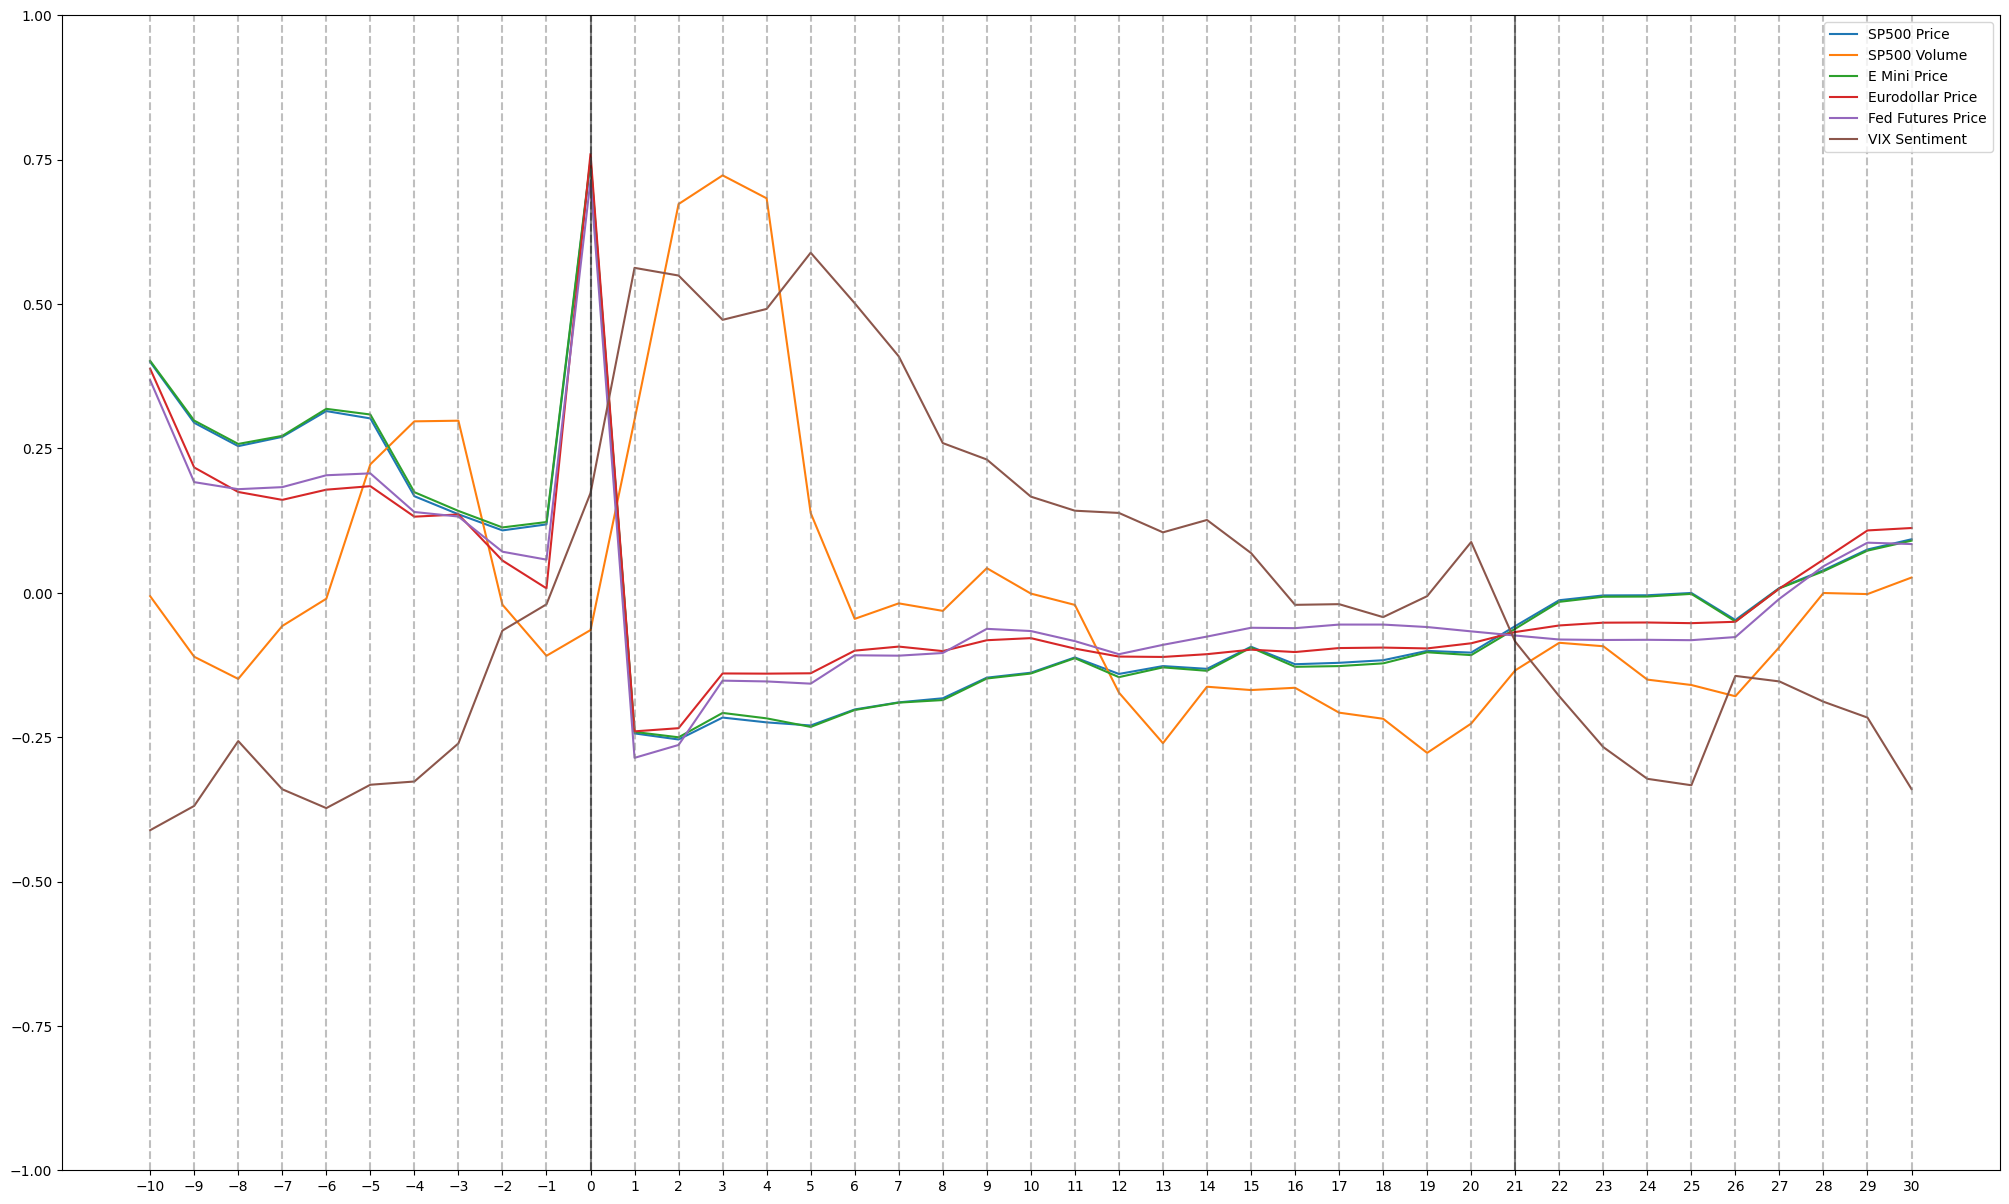

In [16]:
state = state[['date', 'sp500_price', 'sp500_volume', 'emini_price', 'eurodollar_price', 'fedfutures_price', 'vix_sentiment', 'event_count', 'unemployment', 'inflation', 'fedfunds']]
state = state.dropna()

state = state.groupby('event_count').mean().reset_index()

#create a graph of the mean of the market varaibles over the 10 days leading up to and after the event with all the variables scaled between -1 and 1
state['sp500_price'] = (state['sp500_price'] - state['sp500_price'].mean()) / (state['sp500_price'].max() - state['sp500_price'].min())
#state['sp500_std_30'] = (state['sp500_std_30'] - state['sp500_std_30'].mean()) / (state['sp500_std_30'].max() - state['sp500_std_30'].min())
#state['sp500_std_mean'] = (state['sp500_std_mean'] - state['sp500_std_mean'].mean()) / (state['sp500_std_mean'].max() - state['sp500_std_mean'].min())
state['sp500_volume'] = (state['sp500_volume'] - state['sp500_volume'].mean()) / (state['sp500_volume'].max() - state['sp500_volume'].min())
state['emini_price'] = (state['emini_price'] - state['emini_price'].mean()) / (state['emini_price'].max() - state['emini_price'].min())
state['eurodollar_price'] = (state['eurodollar_price'] - state['eurodollar_price'].mean()) / (state['eurodollar_price'].max() - state['eurodollar_price'].min())
state['fedfutures_price'] = (state['fedfutures_price'] - state['fedfutures_price'].mean()) / (state['fedfutures_price'].max() - state['fedfutures_price'].min())
state['vix_sentiment'] = (state['vix_sentiment'] - state['vix_sentiment'].mean()) / (state['vix_sentiment'].max() - state['vix_sentiment'].min())
state['unemployment'] = (state['unemployment'] - state['unemployment'].mean()) / (state['unemployment'].max() - state['unemployment'].min())
state['inflation'] = (state['inflation'] - state['inflation'].mean()) / (state['inflation'].max() - state['inflation'].min())
state['fedfunds'] = (state['fedfunds'] - state['fedfunds'].mean()) / (state['fedfunds'].max() - state['fedfunds'].min())



#Plot the data
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(state['event_count'], state['sp500_price'], label='SP500 Price')
ax.plot(state['event_count'], state['sp500_volume'], label='SP500 Volume')
ax.plot(state['event_count'], state['emini_price'], label='E Mini Price')
ax.plot(state['event_count'], state['eurodollar_price'], label='Eurodollar Price')
ax.plot(state['event_count'], state['fedfutures_price'], label='Fed Futures Price')
ax.plot(state['event_count'], state['vix_sentiment'], label='VIX Sentiment')
#ax.plot(state['event_count'], state['unemployment'], label='Unemployment')
#ax.plot(state['event_count'], state['inflation'], label='Inflation')
#ax.plot(state['event_count'], state['fedfunds'], label='Fed Funds')
ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

ax.set_xticks(state['event_count'])

#Set Y axis sale to -1 to 1
ax.set_ylim(-1, 1)

# #Add a vertical line at all days +-10 Days from the event
# for i in range(0, 11):
#     ax.axvline(x=i, color='gray', linestyle='--', alpha=0.5)
#     ax.axvline(x=i * -1, color='gray', linestyle='--', alpha=0.5)

#Add a vertical line at all days 25 Days from the event
for i in range(0, 31):
    ax.axvline(x=i, color='gray', linestyle='--', alpha=0.5)
for i in range(0, 11):
    ax.axvline(x=i * -1, color='gray', linestyle='--', alpha=0.5)
    
    
#Create a Black Vertical line at 21 days from the event
ax.axvline(x=21, color='black', linestyle='-', alpha=0.5)
ax.axvline(x=0, color='black', linestyle='-', alpha=0.5)

ax.legend()
plt.show()

